In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from matplotlib import cm

In [68]:
#実験データの基本情報
fps = 600 #動画のfps
frame = 601 #動画の総フレーム数
h=841.59 #動画の縦幅(um)

/var/folders/90/657dqc2934j08t1cr2fymyy00000gn/T/ipykernel_2166/1604639319.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  spot = pd.read_csv("./spot_1-601.csv", encoding="shift-jis")


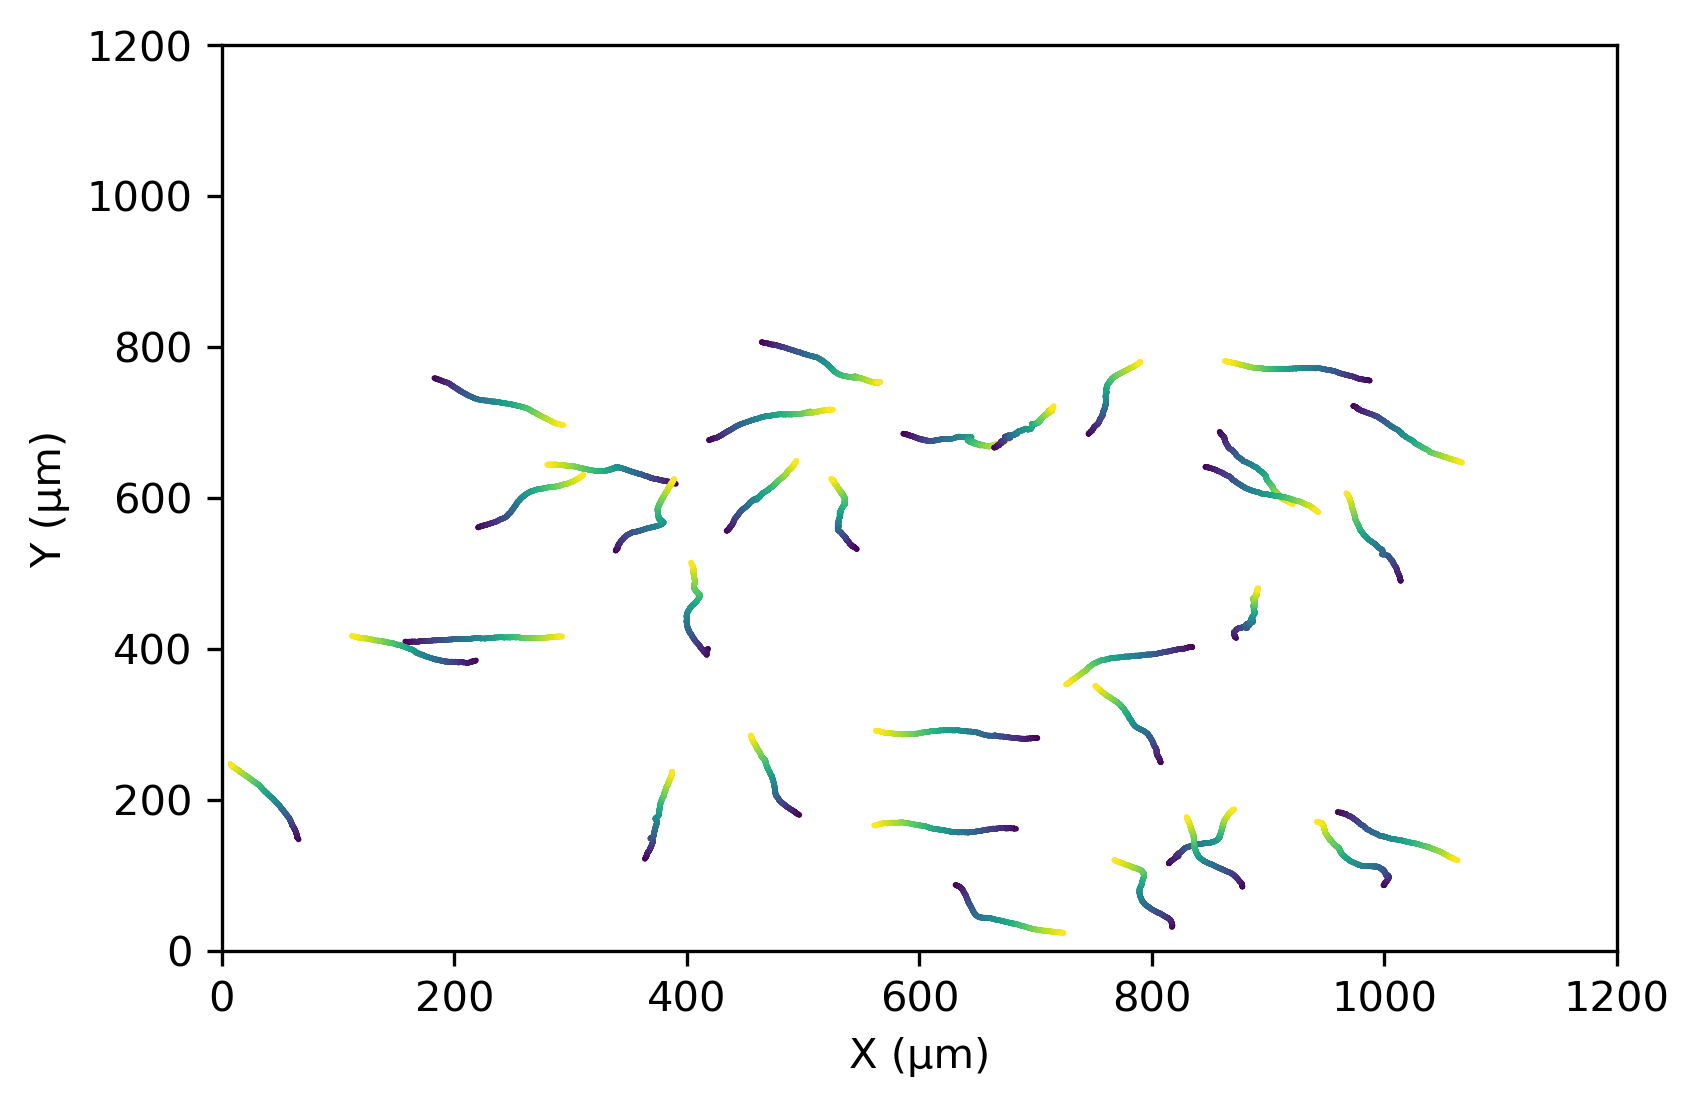

In [69]:
spot = pd.read_csv("./spot_1-601.csv", encoding="shift-jis")
track = pd.read_csv("./track_1-601.csv", encoding="shift-jis")
spots = spot.iloc[3:,2:].astype(float)
tracks = track.iloc[3:,1:].astype(float)


#frameと一致するtrackを抽出
tracks_frame = tracks[tracks.NUMBER_SPOTS == frame]
#track_frameのTRACK_IDを抽出
tracks_TRACK_ID = tracks_frame["TRACK_ID"]
#tracksTRACK_IDに当てはまるspotsを抽出
spots_ID = spots[spots["TRACK_ID"].isin(tracks_TRACK_ID)]
#spots_IDをTRACK_ID→POSITION_Tの優先順位で並び変え
new_data = spots_ID.sort_values(['TRACK_ID', 'POSITION_T'])
id = np.unique(new_data["TRACK_ID"].values)

'''
TRACK_IDが同じものごとにグループ化
[
    [TRACK_ID = 0 のデータ],
    [TRACK_ID = 1 のデータ],
    [TRACK_ID = 2 のデータ],
    .
    .
    .
]
'''
x_list = [new_data[new_data["TRACK_ID"] == i]["POSITION_X"].values for i in id]
y_list = [new_data[new_data["TRACK_ID"] == i]["POSITION_Y"].values for i in id]

min_diff = 230
plt.figure(dpi=300)
for x, y in zip(x_list, y_list):
    x_diff = np.diff(x)
    y_diff = np.diff(y)
    # 移動距離の合計を算出
    move_sum = np.sqrt(x_diff**2 + y_diff**2).sum()
    
    if move_sum > min_diff:
        z = range(len(x))
        mp = plt.scatter(x, h - y, c=z, s=0.1)
        plt.xlabel("X (μm)")
        plt.ylabel("Y (μm)")
        plt.xlim(0,1200)
        plt.ylim(0,1200)
plt.show()


***フーリエ変換の結果***


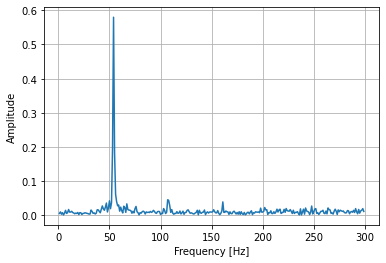

周波数は54.0 Hz
***フーリエ変換の結果***


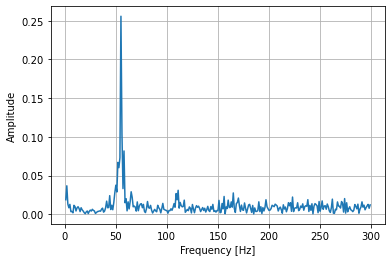

周波数は55.0 Hz
***フーリエ変換の結果***


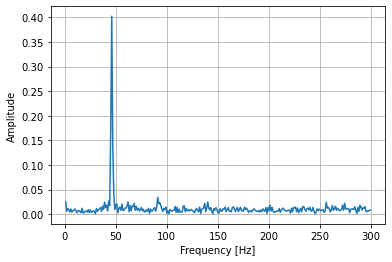

周波数は46.0 Hz
***フーリエ変換の結果***


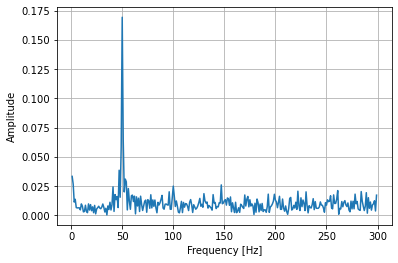

周波数は50.0 Hz
***フーリエ変換の結果***


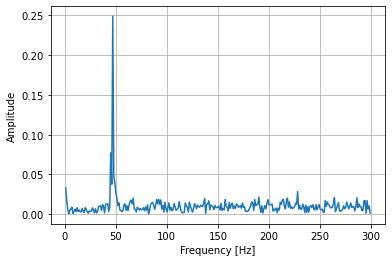

周波数は47.0 Hz
***フーリエ変換の結果***


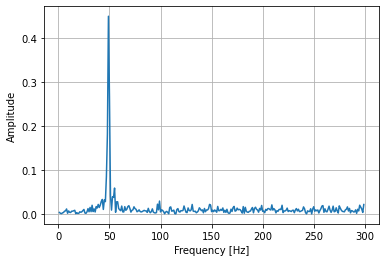

周波数は49.0 Hz
***フーリエ変換の結果***


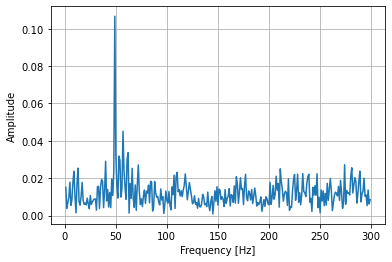

周波数は49.0 Hz
***フーリエ変換の結果***


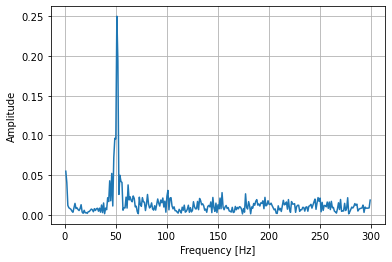

周波数は51.0 Hz
***フーリエ変換の結果***


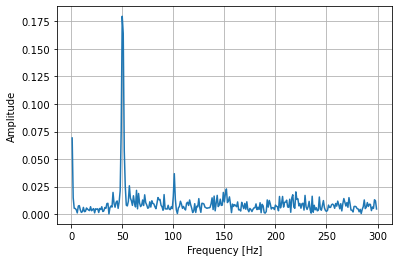

周波数は50.0 Hz
***フーリエ変換の結果***


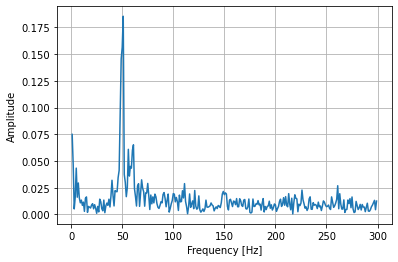

周波数は51.0 Hz
***フーリエ変換の結果***


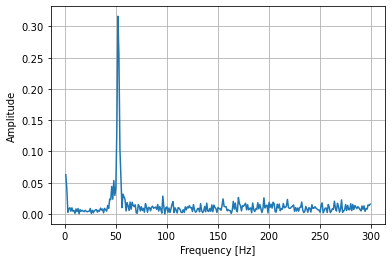

周波数は52.0 Hz
***フーリエ変換の結果***


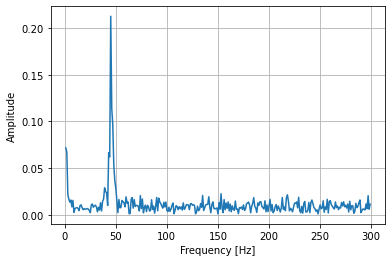

周波数は45.0 Hz
***フーリエ変換の結果***


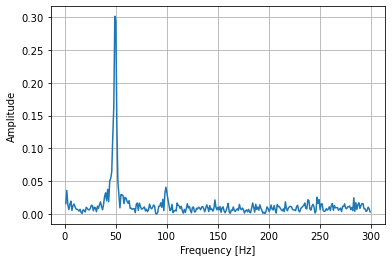

周波数は49.0 Hz
***フーリエ変換の結果***


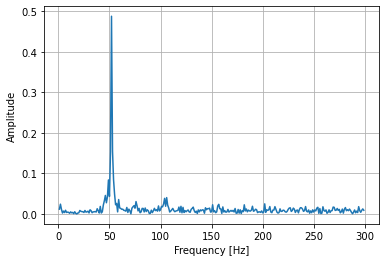

周波数は52.0 Hz
***フーリエ変換の結果***


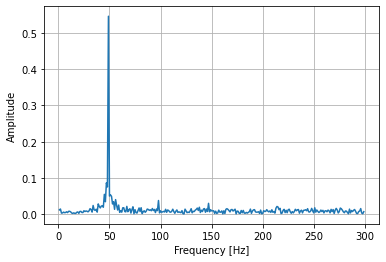

周波数は49.0 Hz
***フーリエ変換の結果***


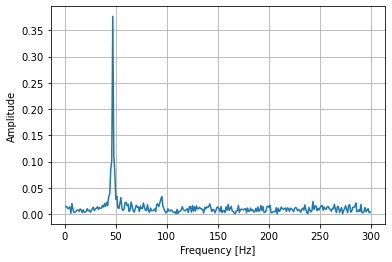

周波数は47.0 Hz
***フーリエ変換の結果***


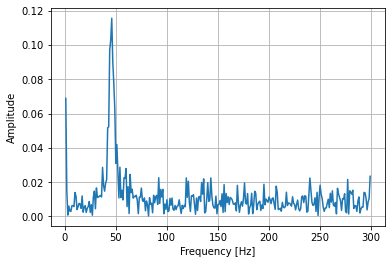

周波数は46.0 Hz
***フーリエ変換の結果***


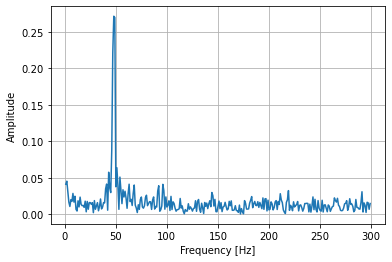

周波数は48.0 Hz
***フーリエ変換の結果***


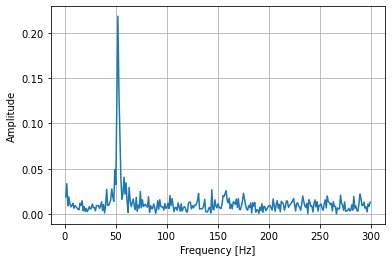

周波数は52.0 Hz
***フーリエ変換の結果***


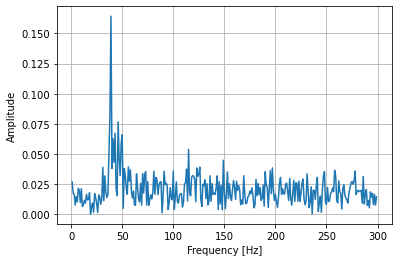

周波数は39.0 Hz
***フーリエ変換の結果***


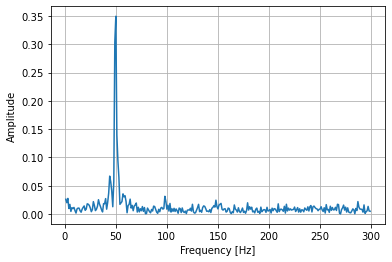

周波数は50.0 Hz
***フーリエ変換の結果***


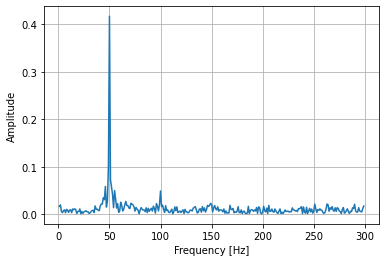

周波数は50.0 Hz
***フーリエ変換の結果***


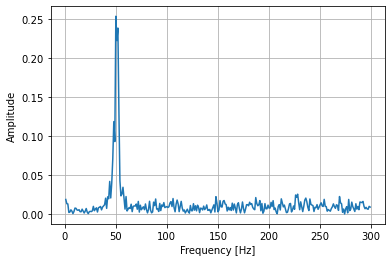

周波数は50.0 Hz
***フーリエ変換の結果***


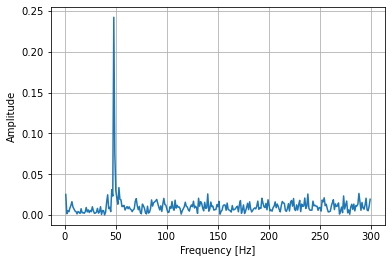

周波数は48.0 Hz
***フーリエ変換の結果***


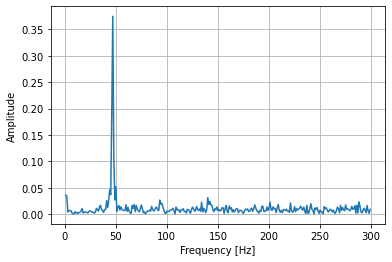

周波数は47.0 Hz
***フーリエ変換の結果***


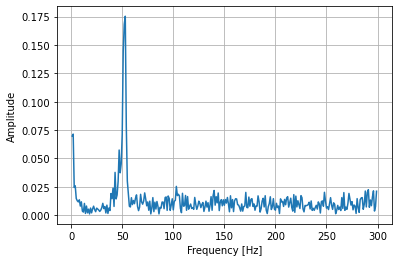

周波数は53.0 Hz
***フーリエ変換の結果***


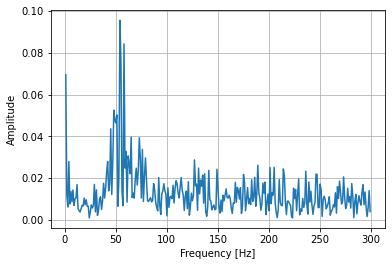

周波数は54.0 Hz
***フーリエ変換の結果***


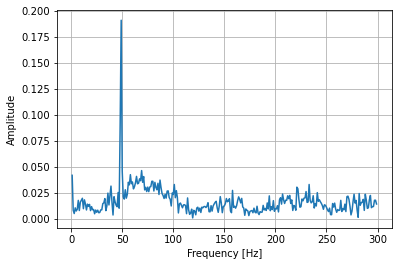

周波数は49.0 Hz
***フーリエ変換の結果***


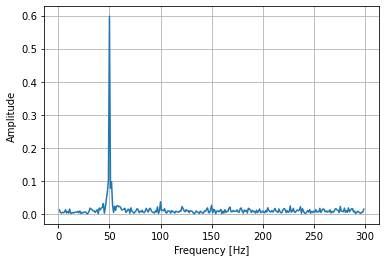

周波数は50.0 Hz
***フーリエ変換の結果***


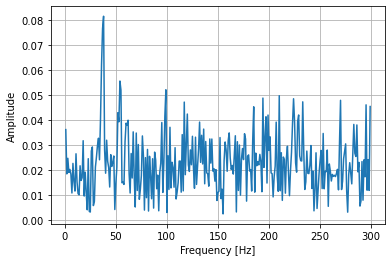

周波数は38.0 Hz
***フーリエ変換の結果***


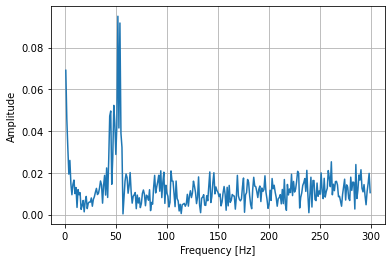

周波数は52.0 Hz
***フーリエ変換の結果***


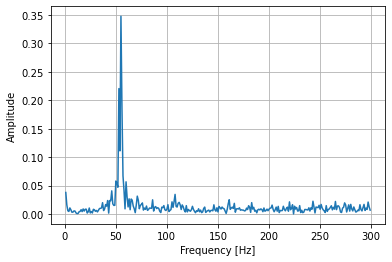

周波数は55.0 Hz
***フーリエ変換の結果***


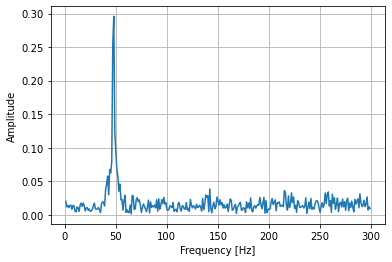

周波数は48.0 Hz


In [81]:
threshold = 230
frequency_list = []
for x, y in zip(x_list, y_list):
    x_diff, y_diff = np.diff(x), np.diff(y)
    length = np.sqrt(x_diff**2 + y_diff**2).sum()
    
    if length > threshold:
        #フーリエ変換
        print("***フーリエ変換の結果***")
        N = len(x_diff) #サンプル数
        dt = 1/600 #サンプリング周期(s) (今回の撮影条件は600 fps)
        F = np.fft.fft(x_diff) # フーリエ変換
        # フーリエ変換の結果を正規化
        F = F / (N / 2)
        freq = np.fft.fftfreq(N, d=dt) # 周波数スケール
        Amp = np.abs(F) # 振幅スペクトル
        stack = np.stack((freq[1:int(N/2)],Amp[1:int(N/2)])) 
        fig, ax = plt.subplots()
        #プロット
        ax.plot(stack[0],stack[1])
        ax.set_xlabel("Frequency [Hz]")
        ax.set_ylabel("Amplitude")
        ax.grid()
        plt.show()
        #振幅が最大値のインデントを取得
        max_indent = np.argmax(stack[1])
        #振幅が最大値のインデントの時の周波数を取得
        max = stack[0][max_indent]
        #プリント
        print("周波数は"+str(max)+" Hz")
        #listに加えていく
        frequency_list.append(max)
        # plt.show()

In [71]:
len(x_list), len(y_list)

(84, 84)

In [72]:
new_data[new_data["TRACK_ID"] == id[0]]["POSITION_X"].values

array([878.29120922, 878.33022959, 878.45456828, 878.28232612,
       878.15049057, 877.91086223, 877.82193627, 877.80369374,
       877.98980478, 878.34206338, 878.50942699, 878.80408916,
       878.80880664, 878.81995221, 878.68816212, 878.74958797,
       878.69004222, 878.69782454, 878.72928498, 879.16088071,
       879.18695679, 879.89569807, 880.09035331, 880.19451624,
       879.86434895, 879.74541914, 879.89794347, 879.83631048,
       879.88249315, 880.06889595, 880.04994128, 879.95799607,
       879.95888448, 880.04994088, 879.90978363, 879.99983055,
       879.83763558, 879.81836381, 879.85101447, 879.92596185,
       879.67425359, 879.5118125 , 879.38318503, 879.28736842,
       879.11323458, 879.32786454, 879.3602962 , 879.55661707,
       879.53624865, 879.68730157, 879.36215027, 879.24636553,
       879.29896696, 879.08598719, 879.00547814, 879.13961494,
       879.12429874, 879.28967069, 879.42228487, 879.95462019,
       880.16034742, 880.3232143 , 880.58559066, 880.68

In [73]:
id

array([  0.,   4.,   7.,  11.,  12.,  15.,  19.,  21.,  25.,  26.,  27.,
        28.,  33.,  34.,  36.,  38.,  39.,  45.,  50.,  51.,  52.,  53.,
        56.,  58.,  63.,  65.,  67.,  75.,  78.,  81.,  82.,  86.,  89.,
        91.,  92.,  93.,  94.,  95.,  99., 100., 101., 102., 103., 105.,
       106., 108., 109., 111., 113., 114., 115., 118., 121., 122., 125.,
       128., 131., 134., 141., 142., 143., 145., 146., 148., 150., 154.,
       155., 157., 158., 161., 162., 163., 164., 166., 168., 169., 171.,
       173., 175., 176., 177., 178., 179., 183.])

In [74]:
np.unique(spots["TRACK_ID"].values)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [75]:
tracks

,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,TRACK_START,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
3,0.0,0.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.010713,0.236832,0.172995,20.336249,168.217213,68.850595,0.408362,0.114489,0.408362,0.982665
4,1.0,1.0,142.0,0.0,0.0,0.0,0.0,0.0,141.0,0.0,...,0.039566,0.305332,0.199158,7.698327,46.499377,1.569194,0.026055,0.008592,0.026055,2.042041
5,2.0,2.0,435.0,0.0,0.0,0.0,0.0,0.0,434.0,0.0,...,0.000000,0.271989,0.279059,18.966652,139.386098,59.458985,0.426578,0.137002,0.426578,0.754536
6,3.0,3.0,117.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,...,0.044254,0.233657,0.142304,6.830458,30.251056,1.408668,0.017372,0.004530,0.017372,2.005949
7,4.0,4.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.003801,0.326454,0.226348,16.699964,224.501560,106.908566,0.474627,0.177591,0.474627,0.836554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,711.0,711.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,596.0,...,0.047780,0.238968,0.101373,5.318277,0.785627,0.436693,0.257422,0.050559,0.257422,2.005909
715,712.0,712.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,597.0,...,0.091791,0.267170,0.114622,5.220528,0.666294,0.307334,0.130039,0.028881,0.130039,1.741935
716,713.0,713.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,598.0,...,0.402266,0.478433,0.053858,5.403347,0.880699,0.478433,0.218783,0.096341,0.218783,2.735367
717,714.0,714.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,598.0,...,0.193649,0.193649,NaN,5.107726,0.193649,0.193649,1.000000,0.193649,1.000000,NaN


In [76]:
tracks_frame

,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,TRACK_START,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
3,0.0,0.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.010713,0.236832,0.172995,20.336249,168.217213,68.850595,0.408362,0.114489,0.408362,0.982665
7,4.0,4.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.003801,0.326454,0.226348,16.699964,224.501560,106.908566,0.474627,0.177591,0.474627,0.836554
10,7.0,7.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.012811,0.284475,0.212209,14.250546,204.326120,94.414212,0.460173,0.156709,0.460173,0.875422
14,11.0,11.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.019572,0.338365,0.229269,14.150701,229.841891,106.548918,0.462202,0.177055,0.462202,0.766328
15,12.0,12.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.010019,0.318736,0.227432,16.197879,217.243654,84.853846,0.388381,0.140622,0.388381,0.980915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,176.0,176.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.008656,0.365673,0.252390,10.037468,248.848098,111.611442,0.446814,0.185315,0.446814,1.086311
180,177.0,177.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.007620,0.308780,0.216310,15.749181,209.936680,108.394054,0.516318,0.180657,0.516318,0.926526
181,178.0,178.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.008676,0.319362,0.250148,15.982148,226.620764,105.165942,0.464061,0.175277,0.464061,0.857803
182,179.0,179.0,601.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,...,0.007911,0.293927,0.214726,19.415316,198.389769,59.348144,0.296401,0.098005,0.296401,1.068518
